In [1]:
import sys
sys.path.append('../')
import src.utils as utils
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
reload(utils)
import scipy.stats as stat

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
np.random.seed(2)

## Euler simulation of BM
The impact of the step size

In [5]:
BM = utils.BrownianMotion(T = 1, Nt = 5)
BM_10 = utils.BrownianMotion(T = 1, Nt = 50)
BM_100 = utils.BrownianMotion(T = 1, Nt = 500)

In [6]:
sims = BM.simulate(nsims = 3)
time = BM.timesteps

sims_10 = BM_10.simulate(nsims = 3)
time_10 = BM_10.timesteps

sims_100 = BM_100.simulate(nsims = 3)
time_100 = BM_100.timesteps

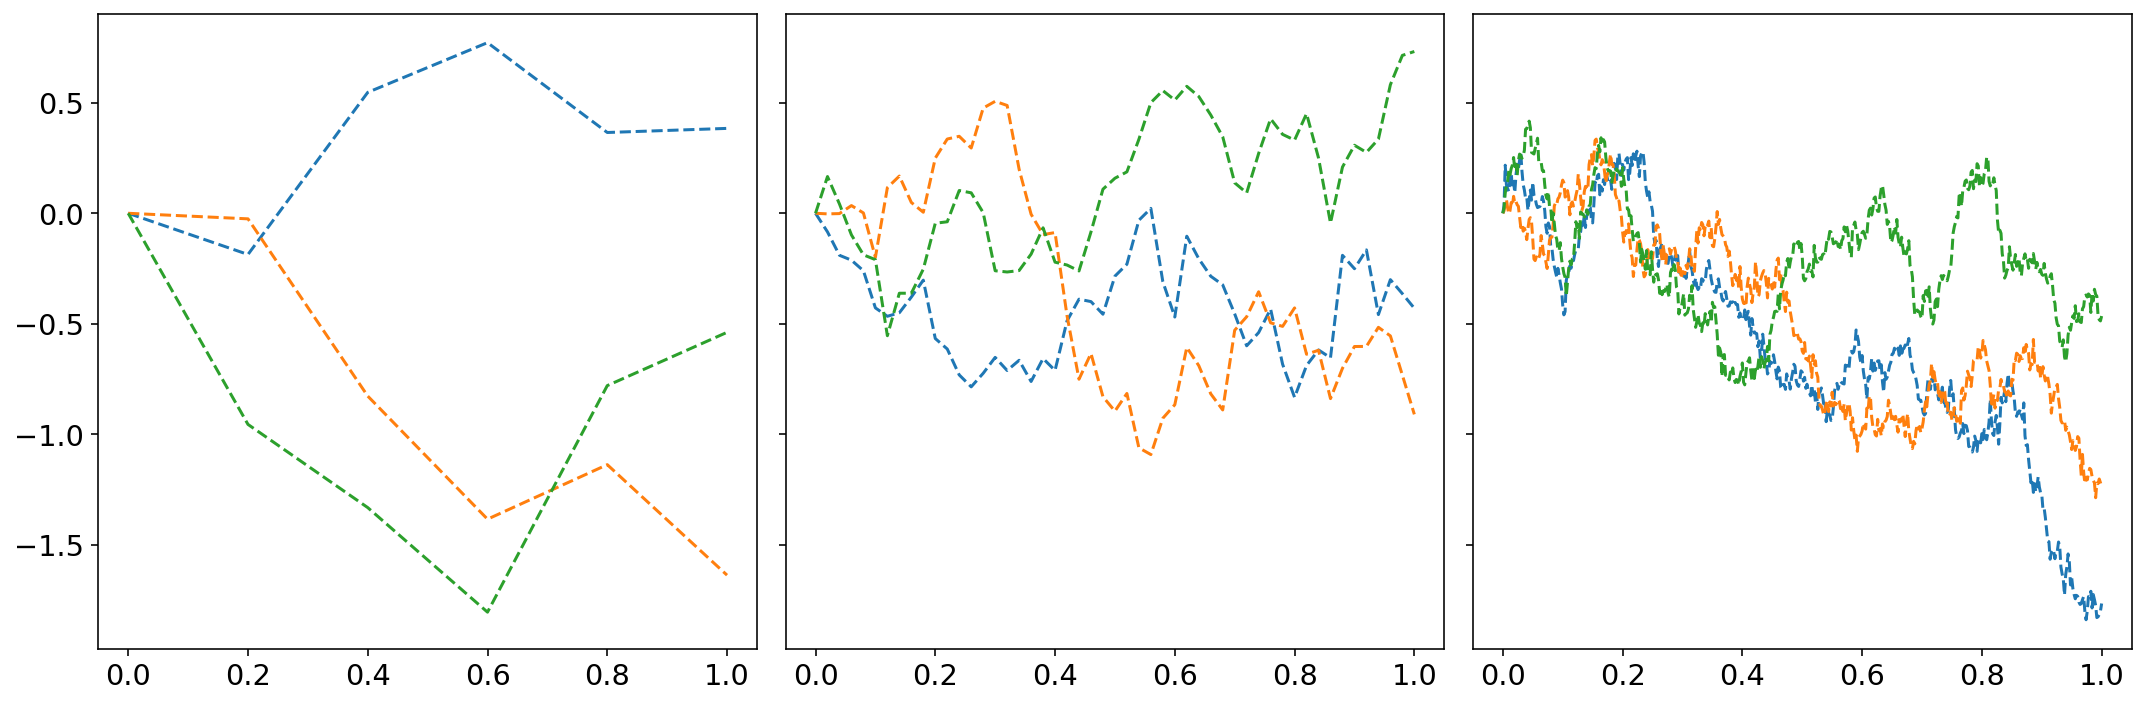

In [7]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
fig.tight_layout(pad=3)
ax[0].plot(time, sims, linestyle = '--')
ax[1].plot(time_10, sims_10, linestyle = '--')
ax[2].plot(time_100, sims_100, linestyle = '--')
resolution_value = 50
plt.tight_layout()
plt.savefig('../figures/impact_of_step_size.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Chevichev's inequality

In [39]:
def indicator_g_K(x,K):
    return 1.0*(np.abs(x)>K)
def fct_x2_overK2(x,K):
    return (x**2) / (K**2)

In [40]:
K = 1
x = np.linspace(-2., 2., 1_000)

f1 = indicator_g_K(x,K)
f2 = fct_x2_overK2(x,K)

#idx = np.argwhere(np.abs(np.diff(f1))>0.99)
#f1[idx] = np.nan

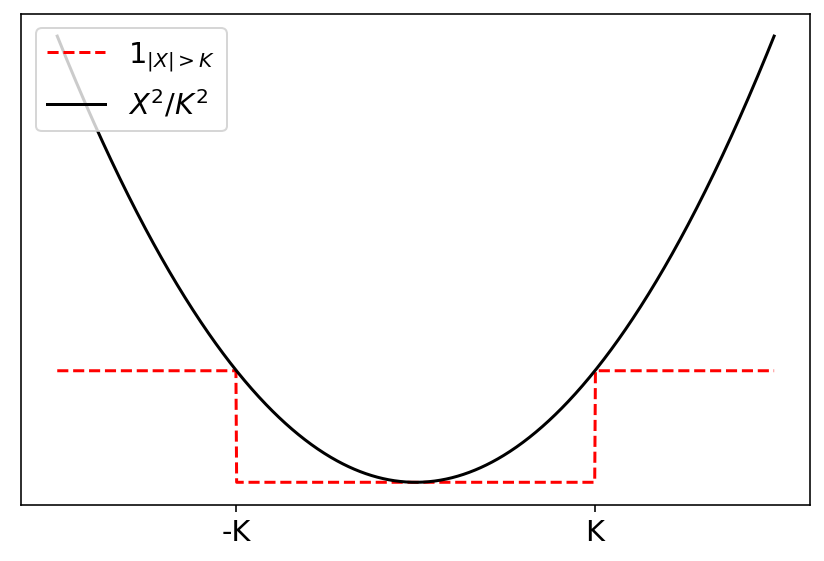

In [41]:
plt.figure()
plt.plot(x, f1, linestyle = '--', color = 'red')
plt.plot(x, f2, linestyle = '-', color='black')
resolution_value = 50
plt.tight_layout()
plt.xticks([-K,K], labels = ['-K','K'])
plt.yticks([])
plt.legend(['$1_{|X|>K}$','$X^2/K^2$'], loc='upper left')
plt.savefig('../figures/Chevichev_inequality.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Quadratic variation

In [49]:
BM = utils.BrownianMotion(T = 1, Nt = 10_000)

In [51]:
path = BM.simulate(nsims=1)
diff = np.diff(path, axis = 0)
QV_proxy = np.sum(diff**2)
print('The proxy of the QV up to T = 1 is: ', QV_proxy)

The proxy of the QV up to T = 1 is:  1.0066059561276774
